## **Linear Regression**

## E-commerce Customers

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Importing data

In [198]:
df = pd.read_csv('Ecommerce_Customers_Synthetic.csv')

### Data Exploration

In [202]:
df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,33.444283,12.642321,40.082786,2.872701,127.442959
1,35.439022,11.604779,40.498418,5.753572,296.159797
2,34.235551,12.649720,38.051207,4.659970,223.521699
3,32.250025,13.219574,36.794531,3.993292,199.375576
4,31.832061,12.902530,38.735955,1.780093,99.930345


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   500 non-null    float64
 1   Time on App           500 non-null    float64
 2   Time on Website       500 non-null    float64
 3   Length of Membership  500 non-null    float64
 4   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [206]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.009906,12.079984,38.115870,3.492809,174.710411
std,1.309181,1.094976,1.582191,1.493442,77.852645
min,29.494047,8.814119,33.325839,1.025308,21.008961
25%,32.153777,11.337327,37.023553,2.206398,104.380386
50%,32.957459,12.088256,38.094954,3.565819,176.221762
75%,33.859724,12.778988,39.218499,4.780624,239.746636
max,37.002545,14.837680,43.108972,5.964824,326.622047


### Visualization

#### *i. Comparing the relationships between the columns*

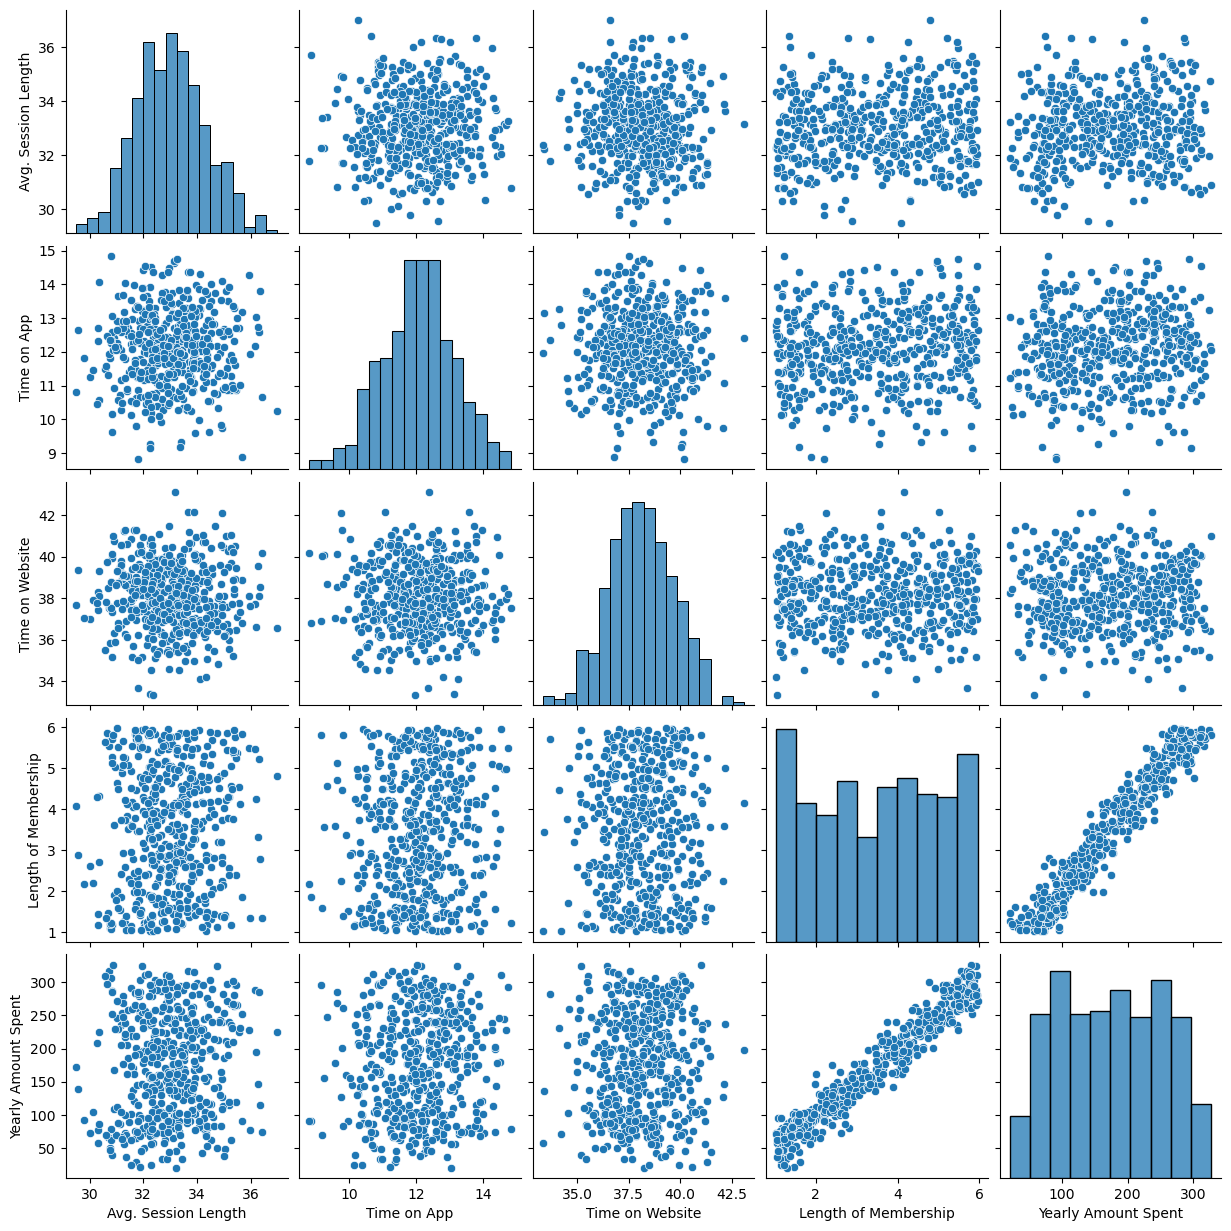

In [210]:
sns.pairplot(df)

#### *ii.  A heatmap of these correlations*

In [212]:
df.corr(numeric_only=True)

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,0.034874,-0.059628,0.068218,0.078922
Time on App,0.034874,1.000000,-0.015259,0.098189,0.091079
Time on Website,-0.059628,-0.015259,1.000000,0.026342,0.010826
Length of Membership,0.068218,0.098189,0.026342,1.000000,0.967952
Yearly Amount Spent,0.078922,0.091079,0.010826,0.967952,1.000000


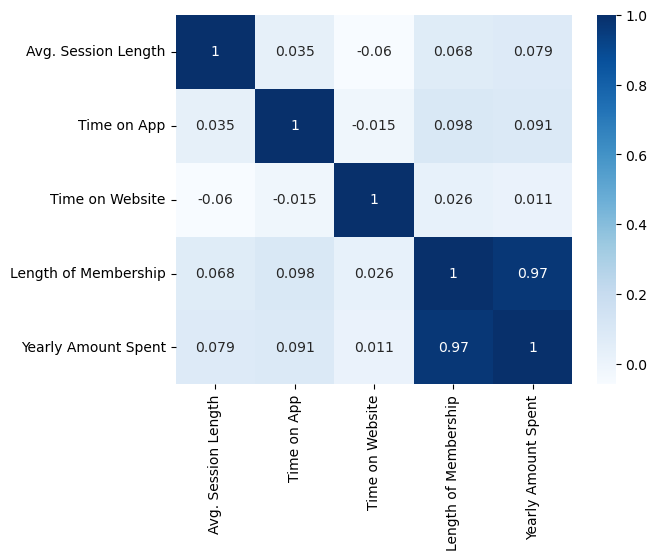

In [214]:
sns.heatmap(df.corr(numeric_only=True), cmap="Blues", annot=True);

### Splitting the data

##### a. Define the features and the target

In [216]:
X = df[['Avg. Session Length',	'Time on App',	'Time on Website',	'Length of Membership']]
y = df['Yearly Amount Spent']

##### b. Splitting

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Iteration

In [220]:
#Instantiate model
model = LinearRegression()

#Fit model
model.fit(X_train, y_train)

LinearRegression()

#### Coefficients

In [222]:
model.coef_

array([ 0.87092092, -0.43669326, -0.44659008, 50.29809769])

### Making Predictions

In [224]:
y_pred = model.predict(X_test)

#### Scatter plot of y_pred and y_test

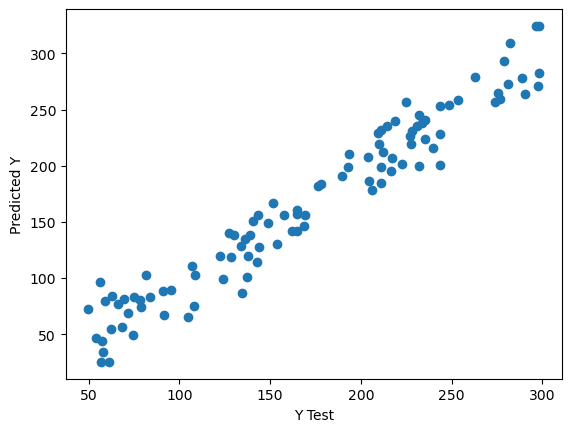

In [226]:
plt.scatter(y_pred, y_test)
plt.xlabel("Y Test")
plt.ylabel("Predicted Y");

## Evaluating the Model

In [228]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 15.338832822392282
Mean Squared Error: 353.84647384851866
Root Mean Squared Error: 18.810807368332668


## Communicating Results

In [230]:
coeffecients = pd.DataFrame(model.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Avg. Session Length,0.870921
Time on App,-0.436693
Time on Website,-0.446590
Length of Membership,50.298098


These numbers mean that, **holding all other features fixed**:

* A **1 unit increase in `Avg. Session Length`** is associated with an **increase of \$0.870921** in **Yearly Amount Spent**.
* A **1 unit increase in `Time on App`** is associated with a **decrease of \$0.436693** in **Yearly Amount Spent**.
* A **1 unit increase in `Time on Website`** is associated with a **decrease of \$0.446590** in **Yearly Amount Spent**.
* A **1 unit increase in `Length of Membership`** is associated with an **increase of \$50.298098** in **Yearly Amount Spent**.

---

### Interpretation:

The model clearly shows that **Length of Membership** has a **very strong positive influence** on the amount a customer spends annually. The coefficient of \~50 means for each additional year of membership, customers are expected to spend **about \$50 more** per year, assuming other factors are held constant.

The negative coefficients for **Time on App** and **Time on Website** might indicate:

* These variables are **not linearly related** to spending.
* Or, they could be **correlated with other variables**, like multicollinearity issues.

---

### Business Insight:

Since **Length of Membership** is such a strong predictor, the business may benefit more from:

* **Retention strategies** (e.g., loyalty programs),
* Rather than just focusing on increasing app or website usage.


### <span style="color:green">Bonus: Checking for multicollinearity issues using VIF</span>

In [235]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add a constant for intercept
X = add_constant(df.drop('Yearly Amount Spent', axis=1))

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                feature          VIF
0                 const  1408.581600
1   Avg. Session Length     1.009255
2           Time on App     1.010815
3       Time on Website     1.004769
4  Length of Membership     1.015075


**`VIF Value`	Interpretation**: <br>
i.  1	No multicollinearity  
ii. 1–5	Moderate multicollinearity (acceptable)  
iii. > 5 or 10	High multicollinearity (problematic)